In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.metrics import classification_report,confusion_matrix
import re

In [29]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1',usecols=['v1','v2'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='v1'>

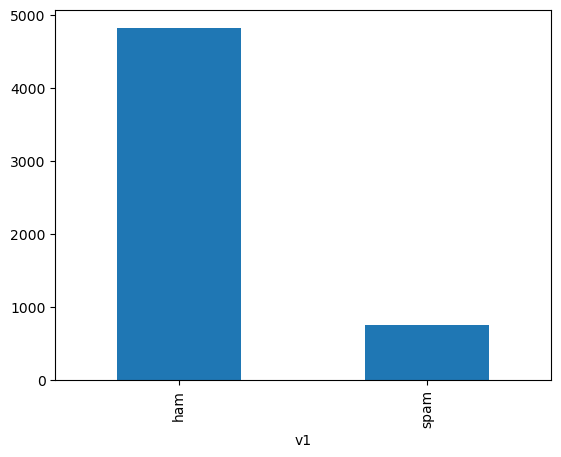

In [40]:
df.groupby('v1').v2.count().plot.bar()

In [14]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
words=stopwords.words('english')
stemmer=PorterStemmer()
print(stemmer)

<PorterStemmer>


In [41]:
df['message']=df['v2'].apply(lambda x : " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-z]"," ",x).split() if i not in words ]).lower())

In [42]:
df

,v1,v2,message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi nd time tri contact u u pound prize claim ...
5568,ham,Will Ì_ b going to esplanade fr home?,will _ b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5570,ham,The guy did some bitching but I acted like i'd...,the guy bitch i act like interest buy someth e...


In [71]:
# Training our dataset
# regressor=LogisticRegression()
vectorizer=TfidfVectorizer(stop_words='english')
x=df['message'].values
y=df['v1'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
# creating pipeline
pipeline=Pipeline([
    ('vect',vectorizer),
    ('chi',SelectKBest(chi2,k=1200)),
    ('clf',LogisticRegression(random_state=100))
])
model=pipeline.fit(x_train,y_train)

In [72]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(x_test)))

0.9736842105263158


In [141]:
dp=[input('enter text message')]


enter text message Congratulations! You have all been selected to receive a free gift card worth $1000. Click on this link https://blog.textingbase.com/how-to-identify-spam-text-messages to claim your reward now. Limited time offer, so act fast! Don't miss out on this amazing opportunity


In [142]:
model.predict(dp)

array(['spam'], dtype=object)

In [125]:
xp=pd.DataFrame(x_test)
ns=xp.iloc[0:10].values

In [131]:
for i in range (len(ns)):
    print("actual v1 :",y_test[i],"predicted v1 :",model.predict(ns[i])," text =" ,x_test[i])

actual v1 : spam predicted v1 : ['spam']  text = you nokia thi get win free auction to take part send nokia hg suit land row w jhl
actual v1 : ham predicted v1 : ['ham']  text = yeah sure give coupl minut track wallet
actual v1 : ham predicted v1 : ['ham']  text = haha yeah oz kind shitload
actual v1 : ham predicted v1 : ['ham']  text = bring home wendi d
actual v1 : ham predicted v1 : ['ham']  text = argh g spotti anyway thing i rememb research provinc sterl problem free place look
actual v1 : ham predicted v1 : ['ham']  text = say slowli god i love you amp i need you clean my heart with your blood send ten special peopl amp u c miracl tomorrow pl pl
actual v1 : ham predicted v1 : ['ham']  text = as i enter cabin pa said happi b day boss i felt special she askd lunch after lunch invit apart we went
actual v1 : ham predicted v1 : ['ham']  text = yup
actual v1 : ham predicted v1 : ['ham']  text = yeah get random dude need chang info sheet parti lt gt never studi safe
actual v1 : ham pre

In [127]:
ns[0]

array(['you nokia thi get win free auction to take part send nokia hg suit land row w jhl'],
      dtype=object)

In [129]:
x_test

array(['you nokia thi get win free auction to take part send nokia hg suit land row w jhl',
       'yeah sure give coupl minut track wallet',
       'haha yeah oz kind shitload', ...,
       'wait e car mum lor u leh reach home alreadi',
       'ladi first genu second k',
       'sorri i call later meet thing relat trade pleas call arul lt gt'],
      dtype=object)

In [143]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(x_test)))

0.9736842105263158


In [146]:
print(classification_report(y_test,model.predict(x_test)))
print(confusion_matrix(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1464
        spam       0.99      0.80      0.88       208

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

[[1462    2]
 [  42  166]]
